In [47]:
from src.cluster.modularity_clustering import modularity_clustering
from src.Graph import Graph
import networkx as nx
import matplotlib.pyplot as plt
import random
import src.cluster.cluster_algorithm as Ca

G = Graph("networks/special_case_for_networkx.mtx")
G = Graph("networks/out.ucidata-zachary_")


In [48]:
def visualize_segmentation(file, calc_segmentation, mode, optimize):
    nxG = nx.read_gexf(file)
    nxG = nx.relabel_gexf_graph(nxG)
    G = Graph()
    for n in nxG.nodes():
        n = n.replace(" ","_")
        G.add_node(n)
    for e1, e2 in nxG.edges():
        e1 = e1.replace(" ", "_")
        e2 = e2.replace(" ", "_")
        G.add_edge(e1,e2)

    segmentation = calc_segmentation(G, mode = mode, optimize = optimize)

    colors = ["green", "yellow","red", "blue", "pink", "purple", "orange"]
    color_id = 0
    nx_index = [n for n in nxG]
    color_map = [ "black" for n in nxG]
    for segment in segmentation:
        color = colors[color_id]
        for n in nxG:
            if n.replace(" ", "_") in segment:
                color_map[nx_index.index(n)] = color
        color_id += 1

    # 1114, 833, 1997, 764,  947, 164
    seed = random.randint(1,2000)
    print(seed)

    my_pos = nx.spring_layout(nxG, seed = 1104)
    plt.figure(figsize=(12,12))
    nx.draw(nxG, pos = my_pos, node_color= color_map,with_labels=True, node_size=500, edge_color='black', linewidths=1, font_size=8)
    plt.title((mode, optimize), fontsize=30)
    plt.show()

In [49]:
def clustering(G, mode = "cut", optimize="modularity"):
    if mode == "cut":
        if optimize == "modularity":
            cl, _ = Ca.second_heuristic(G)
        else:
            cl, _ = Ca.second_heuristic(G, version = "dis")
    if mode == "merge":
        if optimize == "modularity":
            cl = modularity_clustering(G) #meine funktion
        else:
            cl, _ = Ca.first_heuristic(G, version = "dis")
    return cl

1327


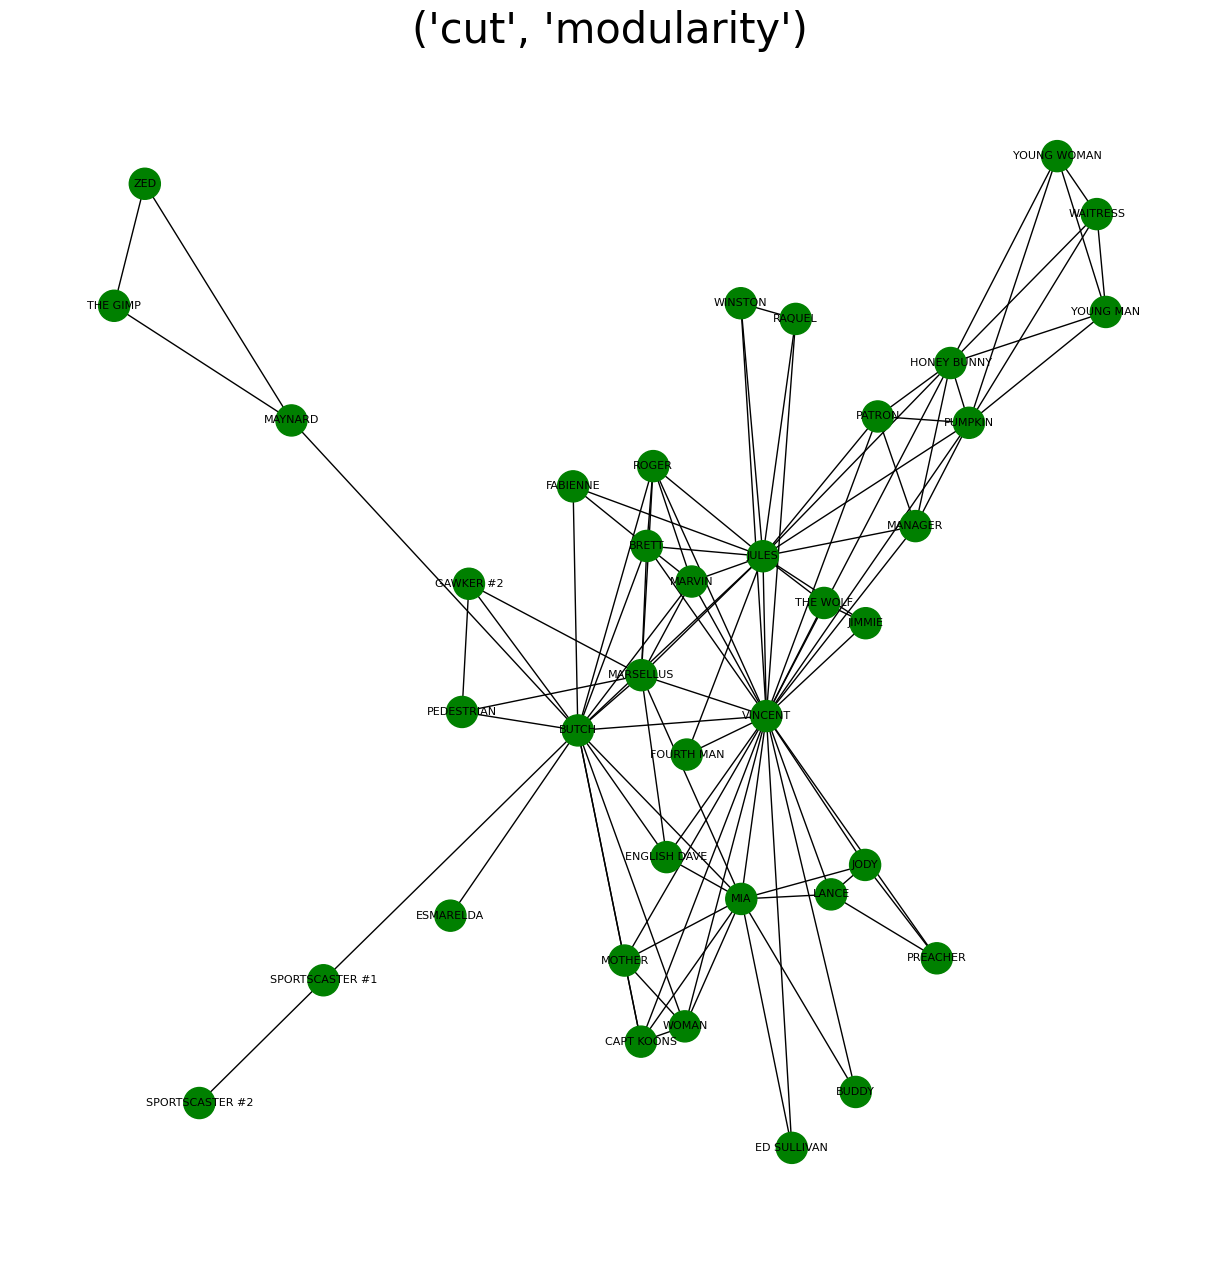

In [50]:

visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "cut", "modularity")

1158


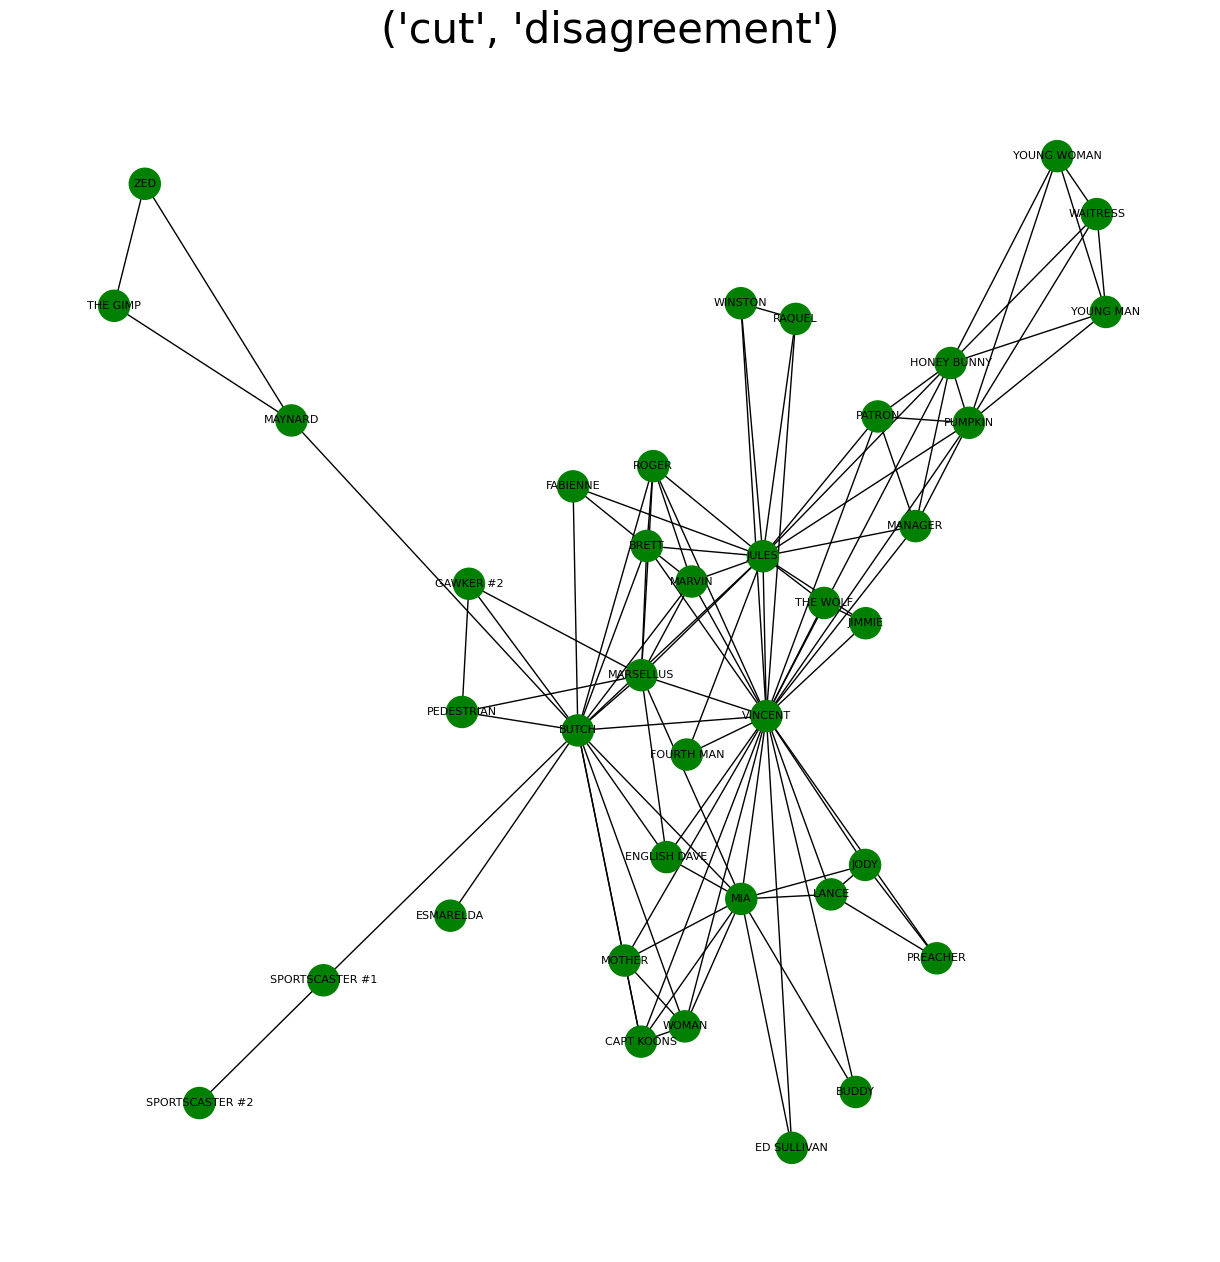

In [51]:

visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "cut", "disagreement")

294


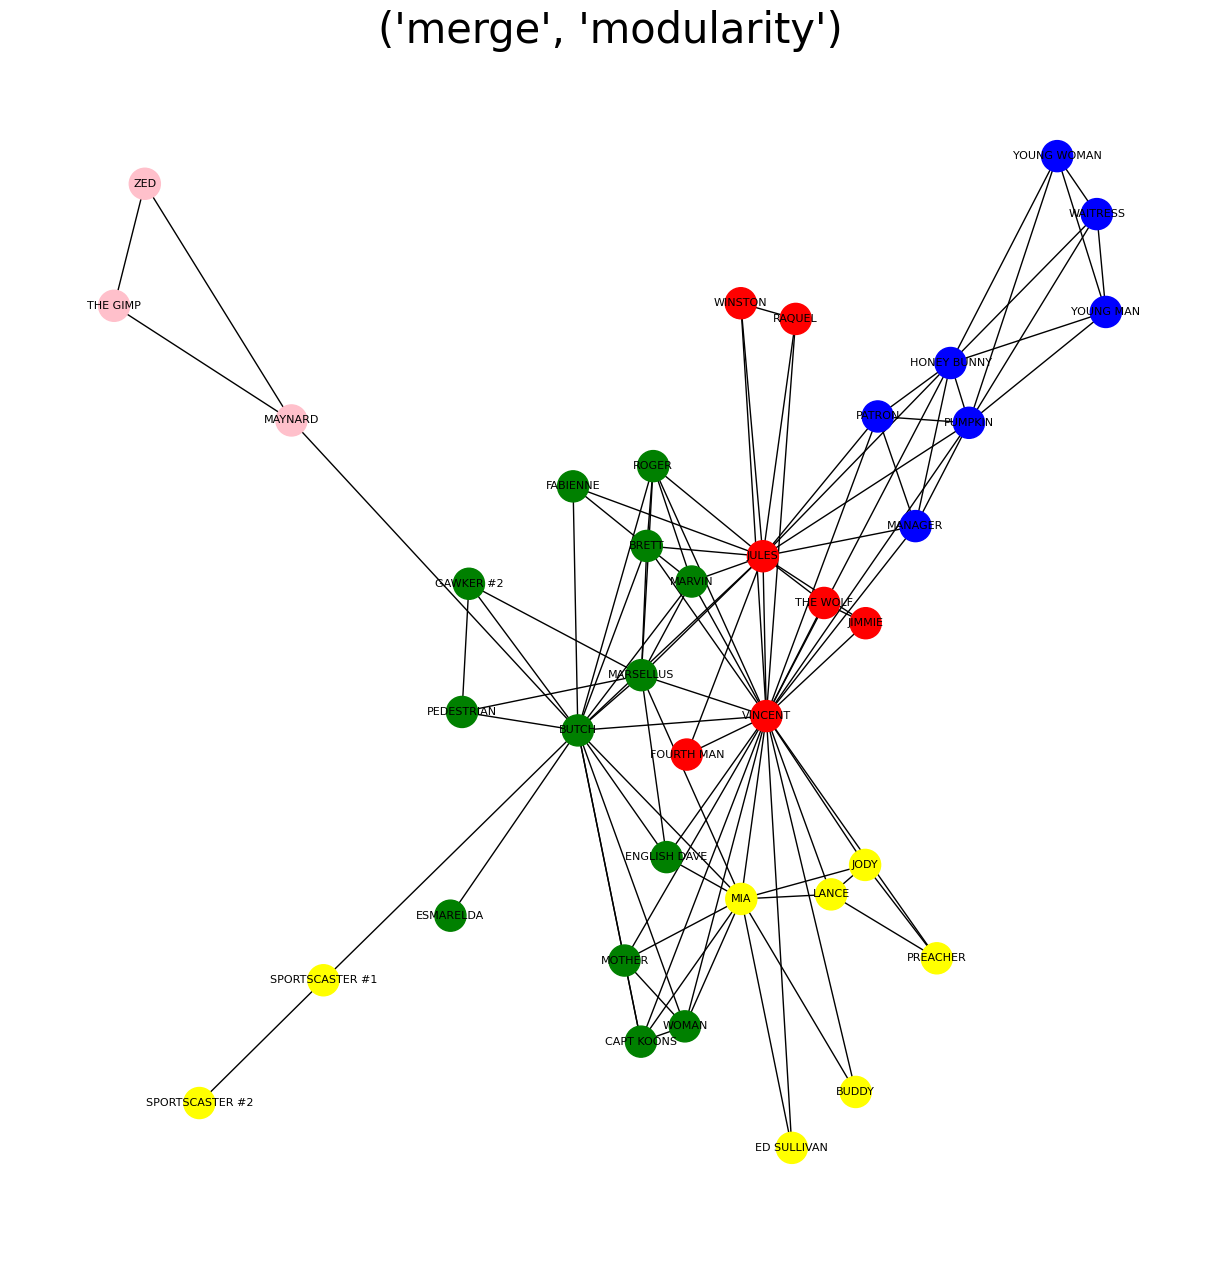

In [52]:
visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "merge", "modularity")


1169


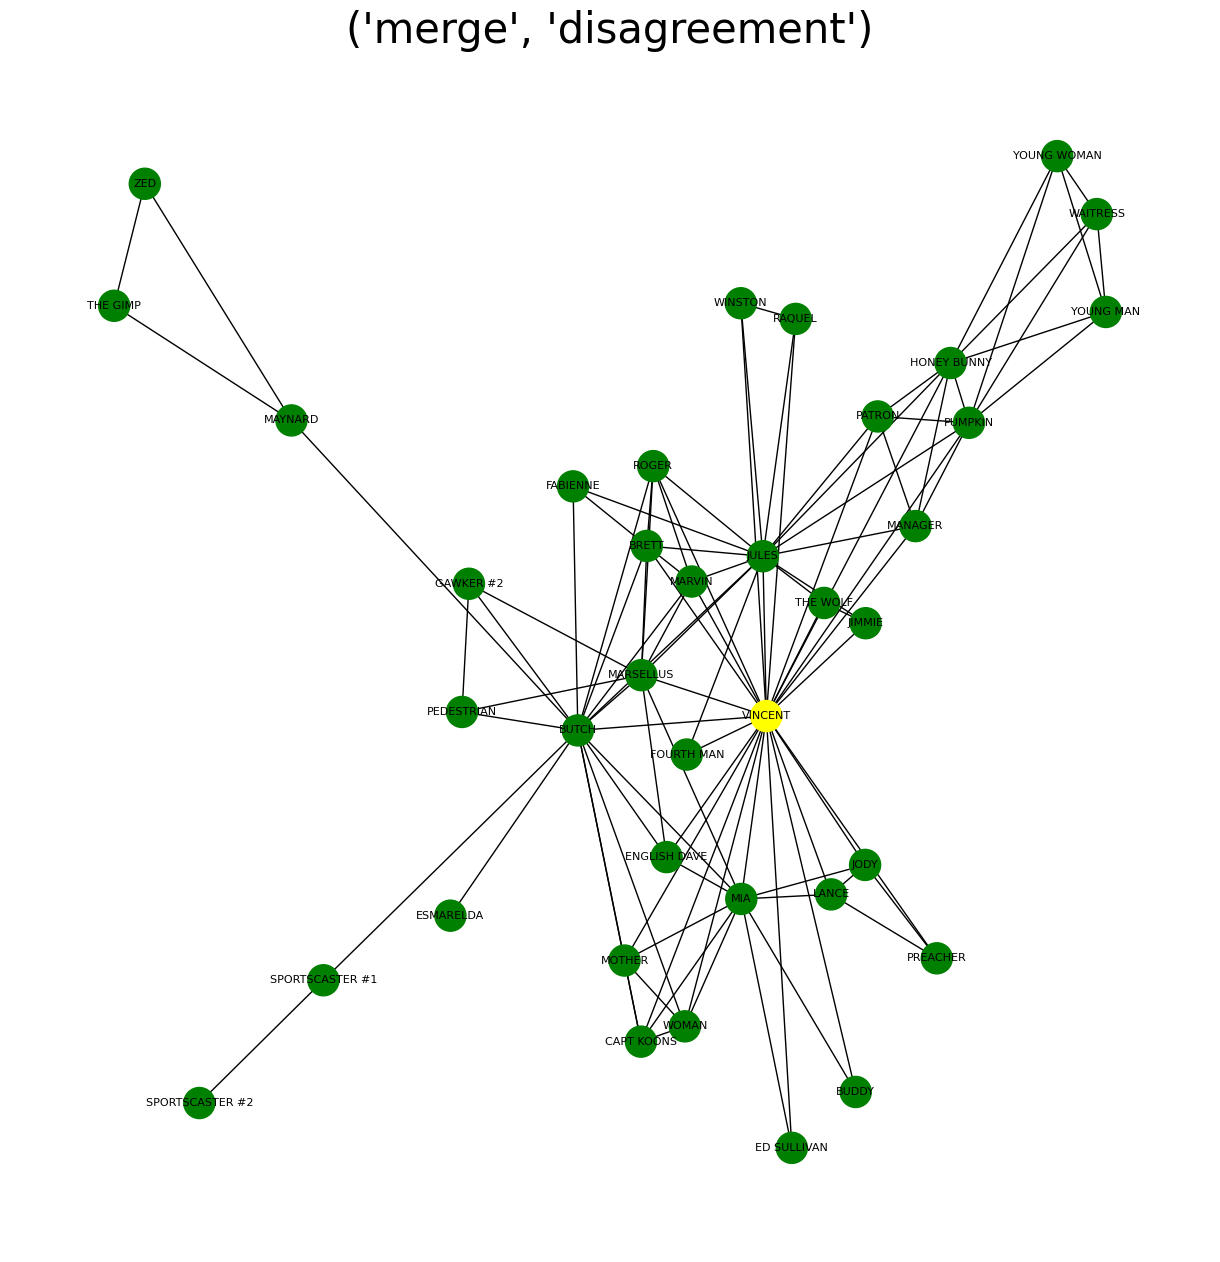

In [53]:
visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "merge", "disagreement")